# Parallel processing in NaaVRE workflows

## “Classic” splitting for processing a small number of items

When processing a small number of items, we can use a simple approach with three cells:

- Cell 1 generates a list of $n$ items
- Cell 2 iterates over the list of items, processing each item after the other, and saving the result in a new list
- Cell 3 consumes the list of processed items

In the *notebook context*, items are processed sequentially in cell 2.

In the *workflow context*, we can introduce a splitter and a merger around cell 2. 

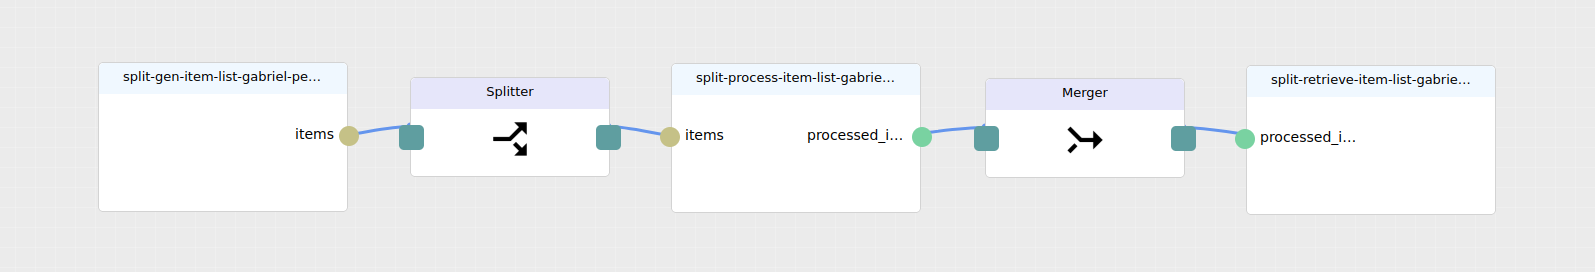

As a result, $n$ instances of cell 2 are created. Each instance processes a single item. Instances run in parallel.  

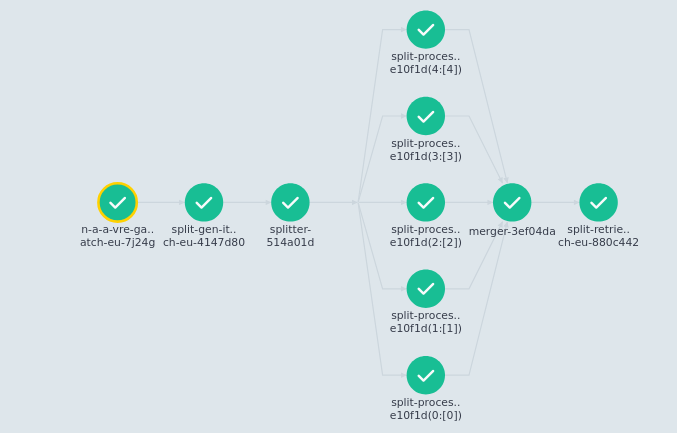

Under the hood, the splitter splits the list of $n$ items (example `[1, 2, 3]`) into $n$ lists of one item (example `[1]`, `[2]`, and `[3]`). Each list is then passed to the corresponding instance of cell 2. Conversely, the merger merges $n$ lists of one item into a list of $n$ items. 

### Cell 0: Workflow parameters

In [1]:
# (do not containerize!)
param_item_count = 5

### Cell 1: generate a list of items

This cell creates a list of $n$ items. It works the same in the notebook and workflow contexts.  
Example output: `[0, 1, 2, 3, 4]`

In [2]:
# split: gen item list

# your code to generate the items to be processed
items = list(range(param_item_count))
print(f'Generated items: {items}')

Generated items: [0, 1, 2, 3, 4]


### Cell 2: process a list of items

This list iteratively processes a list of items. The list contains $n$ items in the *notebook context*, and $1$ item in the *workflow context*.  

Example in the *notebook context*:

|        | notebook                                |
|--------|:----------------------------------------|
| input  | `[0, 1, 2, 3, 4]`                       |
| output | `[0.0, 0.0238, 0.0476, 0.0714, 0.0952]` |

Example in the *workflow context*:

|        | cell 1     | cell 2     | cell 3     | ...    |
|--------|:-----------|:-----------|:-----------|:-------|
| input  | `[0]`      | `[1]`      | `[2]`      | ...    |
| output | `[0.0]`    | `[0.0238]` | `[0.0476]` | ...    |


In [3]:
# split: process item list

# your code to process an individual item
def process_item(item):
    print(f'Processing item {item}')
    return item / 42

# iteratively process all items
print(f'Items to process: {items}')
processed_items = []
for item in items:
    processed_items.append(process_item(item))
print(f'Processed items: {processed_items}')

Items to process: [0, 1, 2, 3, 4]
Processing item 0
Processing item 1
Processing item 2
Processing item 3
Processing item 4
Processed items: [0.0, 0.023809523809523808, 0.047619047619047616, 0.07142857142857142, 0.09523809523809523]


### Cell 3: consume a list of generated items

Example input: `[0.0, 0.0238, 0.0476, 0.0714, 0.0952]`

In [4]:
# split: retrieve item list
print(f'Processed items: {processed_items}')

Processed items: [0.0, 0.023809523809523808, 0.047619047619047616, 0.07142857142857142, 0.09523809523809523]


When processing larger number of items, see the “batch” splitting approach: [splitting-batch.ipynb](./splitting-batch.ipynb).